<a href="https://colab.research.google.com/github/chingyaousf/Intern-project-2023/blob/main/scripts/MLpredictionDep_03_Model_RF_EIF2AK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DeepDEP/filtered_arranged_table.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,ZYG11A (440590) Exp,ZYG11B (79699) Exp,ZYX (7791) Exp,ZZEF1 (23140) Exp,ZZZ3 (26009) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,3.116032,0.056584,0.226509,0.111031,0.000000,1.035624,0.176323,5.700440,4.144046,...,3.282440,2.797013,6.821455,3.010780,4.381975,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,4.178715,0.000000,0.214125,0.344828,0.070389,0.097611,0.000000,6.336819,3.231125,...,0.014355,2.032101,7.002252,3.444932,4.910733,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,4.003602,0.014355,0.137504,0.014355,0.000000,0.028569,0.000000,6.337176,3.781360,...,0.014355,2.761285,6.826421,3.524816,5.592457,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.137504,1.405992,0.201634,0.000000,0.000000,0.014355,0.000000,5.431289,4.300856,...,0.014355,1.989139,6.332708,3.673556,3.469886,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,1.464668,3.586164,0.250962,0.000000,0.042644,4.525443,0.000000,5.674122,4.510962,...,1.356144,2.956057,7.853185,3.442280,3.351911,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,1.967169,0.000000,2.198494,0.000000,0.000000,1.490570,0.000000,5.300490,4.314697,...,0.014355,4.173127,6.560256,2.969012,5.276869,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,3.847997,0.000000,5.899901,0.321928,0.000000,3.206331,0.000000,5.831877,3.822730,...,0.622930,3.084064,6.596935,3.177918,4.847997,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,1.819668,0.014355,0.014355,0.201634,0.000000,2.912650,0.028569,5.646451,4.547820,...,1.400538,2.568032,6.953498,3.087463,4.226509,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,2.990955,0.000000,7.608440,0.014355,0.000000,0.584963,0.000000,5.104337,4.228819,...,1.480265,2.748461,7.432041,2.903038,4.660495,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/EIF2AK3_gt_00.csv")
data

,DepMap_ID,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GNT (51146) Exp,AACS (65985) Exp,AADAC (13) Exp,AADACL2 (344752) Exp,AADACL4 (343066) Exp,AAGAB (79719) Exp,AAK1 (22848) Exp,...,ZW10 (9183) Exp,ZWILCH (55055) Exp,ZXDC (79364) Exp,ZZEF1 (23140) Exp,ZZZ3 (26009) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,0.111031,0.000000,0.176323,4.144046,0.790772,0.014355,0.000000,5.752213,3.078951,...,3.555816,5.080658,4.700994,3.010780,4.381975,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.344828,0.070389,0.000000,3.231125,0.000000,0.000000,0.000000,4.416164,2.292782,...,3.980939,4.276497,3.619413,3.444932,4.910733,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.014355,0.000000,0.000000,3.781360,0.000000,0.000000,0.000000,4.791293,2.625270,...,4.703765,5.628482,3.763412,3.524816,5.592457,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.000000,0.000000,0.000000,4.300856,3.547203,0.014355,0.000000,5.053546,1.970854,...,3.827819,3.842979,3.872829,3.673556,3.469886,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,0.000000,0.042644,0.000000,4.510962,1.985500,0.000000,0.000000,5.246028,3.397803,...,5.481880,4.761817,3.773996,3.442280,3.351911,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.000000,0.000000,0.000000,4.314697,0.042644,0.000000,0.000000,6.511278,3.819668,...,3.198494,5.974300,2.918386,2.969012,5.276869,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,0.321928,0.000000,0.000000,3.822730,1.443607,0.000000,0.333424,5.974759,4.034744,...,3.871844,4.839456,2.639232,3.177918,4.847997,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,0.201634,0.000000,0.028569,4.547820,0.000000,0.000000,0.042644,5.193378,4.133399,...,3.438293,3.816600,2.904966,3.087463,4.226509,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,0.014355,0.000000,0.000000,4.228819,0.000000,0.000000,0.000000,5.491532,3.396434,...,3.367371,4.788164,2.845992,2.903038,4.660495,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("//content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/EIF2AK3_gt_01.csv")
data

,DepMap_ID,ABCA12 (26154) Exp,ATG3 (64422) Exp,BCL2A1 (597) Exp,EGR3 (1960) Exp,FYB1 (2533) Exp,GFM1 (85476) Exp,HCLS1 (3059) Exp,KRR1 (11103) Exp,LAMB4 (22798) Exp,...,RPS19BP1 (91582) Exp,RPS6KA5 (9252) Exp,TBRG4 (9238) Exp,TMEM229B (161145) Exp,UTP4 (84916) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,0.111031,5.981168,0.084064,0.485427,0.056584,6.224388,0.536053,5.495056,0.028569,...,6.325350,1.584963,6.088311,0.124328,5.053111,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.028569,5.690976,0.310340,0.056584,4.424250,5.481880,7.470537,5.664483,0.084064,...,6.777551,2.472488,6.286696,2.217231,5.770829,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.000000,6.114783,1.344828,0.201634,4.415488,6.262095,7.515384,5.888256,0.014355,...,6.738363,2.657640,6.593951,2.733354,6.045487,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.056584,5.661636,0.124328,0.464668,0.014355,4.707083,0.356144,4.933573,0.298658,...,6.654493,1.144046,6.950818,1.150560,5.428276,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,0.028569,5.686220,0.070389,0.189034,0.124328,5.936638,0.214125,6.026800,0.201634,...,6.586465,1.550901,6.922317,0.097611,6.929081,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.014355,6.939227,0.310340,0.014355,0.070389,5.080658,0.555816,6.216067,0.189034,...,4.570463,2.643856,5.456149,2.443607,5.321567,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,0.070389,5.191800,3.080658,0.613532,0.400538,3.488001,3.295723,4.891419,0.475085,...,5.639522,2.049631,5.912650,1.124328,4.663914,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,0.028569,4.889474,0.097611,0.250962,0.263034,4.679199,5.885086,5.809414,0.189034,...,5.689579,1.304511,4.823240,0.895303,5.445925,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,0.356144,5.702103,0.000000,0.084064,1.389567,5.165912,0.310340,5.291677,0.070389,...,5.895060,2.446256,6.087463,0.978196,5.442612,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/EIF2AK3_ng_01.csv")
data

,DepMap_ID,ANGPTL2 (23452) Exp,DDAH2 (23564) Exp,DES (1674) Exp,FCGRT (2217) Exp,GREM1 (26585) Exp,INSRR (3645) Exp,LGR5 (8549) Exp,LOXL1 (4016) Exp,NID2 (22795) Exp,...,TAS2R8 (50836) Exp,TMEM35A (59353) Exp,ZC4H2 (55906) Exp,ZNF578 (147660) Exp,ZNF835 (90485) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,3.447579,5.597233,0.150560,4.473137,1.843984,0.014355,2.014355,4.483493,3.548437,...,0.000000,0.150560,3.807355,0.028569,0.000000,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.042644,4.897724,0.367371,6.745641,0.855990,0.189034,0.014355,1.485427,0.948601,...,0.056584,0.000000,3.589763,0.000000,0.111031,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.097611,4.011675,0.831877,5.491532,0.014355,0.070389,0.070389,1.918386,1.863938,...,0.000000,0.000000,3.512227,0.070389,0.214125,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.084064,4.855491,0.344828,5.624101,0.084064,0.000000,2.495695,0.084064,0.298658,...,0.042644,0.014355,1.704872,0.000000,0.000000,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,0.084064,6.366322,0.189034,5.810186,1.250962,0.000000,3.622930,0.443607,0.963474,...,0.000000,0.000000,2.500802,0.000000,0.000000,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.056584,3.594549,2.718088,3.119356,9.953585,0.014355,0.042644,6.542722,7.526851,...,0.000000,0.028569,4.009885,0.918386,2.752749,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,5.994580,4.378512,0.526069,5.288359,7.616843,0.124328,3.142413,6.273143,6.652486,...,0.000000,3.872829,2.887525,0.565597,0.000000,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,6.017031,4.978653,0.084064,5.029895,8.998760,0.000000,2.411426,7.668034,4.226509,...,0.000000,2.443607,3.780310,1.310340,0.000000,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,1.263034,6.766993,0.594549,2.761285,2.244887,0.000000,0.000000,5.448240,2.432959,...,0.000000,0.014355,2.313246,0.695994,0.000000,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
from numpy import true_divide
# Cleaning Column Names
clean_column_names = {}
for column in data.columns:
    clean_column_names[column] = column.strip().replace(' ', '_').replace('(', '').replace(')', '')

data.rename(columns=clean_column_names, inplace=True)
data

,DepMap_ID,ANGPTL2_23452_Exp,DDAH2_23564_Exp,DES_1674_Exp,FCGRT_2217_Exp,GREM1_26585_Exp,INSRR_3645_Exp,LGR5_8549_Exp,LOXL1_4016_Exp,NID2_22795_Exp,...,TAS2R8_50836_Exp,TMEM35A_59353_Exp,ZC4H2_55906_Exp,ZNF578_147660_Exp,ZNF835_90485_Exp,EIF2AK3_9451_Dep,MYC_4609_Dep,NQO1_1728_Dep,SF3B1_23451_Dep,SQSTM1_8878_Dep
0,ACH-000001,3.447579,5.597233,0.150560,4.473137,1.843984,0.014355,2.014355,4.483493,3.548437,...,0.000000,0.150560,3.807355,0.028569,0.000000,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.042644,4.897724,0.367371,6.745641,0.855990,0.189034,0.014355,1.485427,0.948601,...,0.056584,0.000000,3.589763,0.000000,0.111031,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.097611,4.011675,0.831877,5.491532,0.014355,0.070389,0.070389,1.918386,1.863938,...,0.000000,0.000000,3.512227,0.070389,0.214125,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.084064,4.855491,0.344828,5.624101,0.084064,0.000000,2.495695,0.084064,0.298658,...,0.042644,0.014355,1.704872,0.000000,0.000000,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,0.084064,6.366322,0.189034,5.810186,1.250962,0.000000,3.622930,0.443607,0.963474,...,0.000000,0.000000,2.500802,0.000000,0.000000,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.056584,3.594549,2.718088,3.119356,9.953585,0.014355,0.042644,6.542722,7.526851,...,0.000000,0.028569,4.009885,0.918386,2.752749,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,5.994580,4.378512,0.526069,5.288359,7.616843,0.124328,3.142413,6.273143,6.652486,...,0.000000,3.872829,2.887525,0.565597,0.000000,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,6.017031,4.978653,0.084064,5.029895,8.998760,0.000000,2.411426,7.668034,4.226509,...,0.000000,2.443607,3.780310,1.310340,0.000000,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,1.263034,6.766993,0.594549,2.761285,2.244887,0.000000,0.000000,5.448240,2.432959,...,0.000000,0.014355,2.313246,0.695994,0.000000,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Exclude 'DepMap_ID' column
data_without_id = data.drop(columns=['DepMap_ID'])

# Extracting Features and Targets
features = data_without_id.drop(columns=[col for col in data_without_id.columns if 'Dep' in col])
# targets = data_without_id[[col for col in data_without_id.columns if 'Dep' in col]]
targets = data_without_id[["EIF2AK3_9451_Dep"]]

targets

,EIF2AK3_9451_Dep
0,0.018546
1,0.044907
2,0.009301
3,0.058868
4,0.040590
...,...
1000,0.038095
1001,0.177952
1002,0.002074
1003,0.161273


In [ ]:
# Splitting the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [ ]:
# Creating and Training the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

<ipython-input-46-dbdfc2eb6e5e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Making Predictions
y_pred = rf.predict(X_test)

In [ ]:
# Printing Predicted Values
print('Predicted Values:', y_pred)


Predicted Values: [0.07425311 0.0509687  0.04635548 0.05198153 0.04766962 0.06689553
 0.07686024 0.05529171 0.05389359 0.04110572 0.04744159 0.0808779
 0.08042955 0.05241745 0.09528842 0.03606442 0.08454682 0.0937762
 0.05827836 0.17773732 0.07172214 0.06722554 0.03438324 0.10166398
 0.07781914 0.05430508 0.07407175 0.05620868 0.10168449 0.09378695
 0.07617954 0.04441482 0.04507208 0.0640809  0.08509515 0.04645644
 0.08296611 0.05696191 0.06056921 0.07414526 0.11119816 0.07307591
 0.05849879 0.09458006 0.06713272 0.06755642 0.05927348 0.08404916
 0.06784367 0.08483576 0.07370152 0.07653023 0.0598682  0.15463802
 0.06062202 0.0601621  0.07952826 0.04898445 0.05927935 0.04318228
 0.06117046 0.0550372  0.06794363 0.03896438 0.04773654 0.06442223
 0.07968937 0.05221445 0.0694013  0.05847389 0.03790652 0.07057014
 0.04714484 0.06083203 0.10033949 0.07732274 0.10353321 0.0663747
 0.06293358 0.0707569  0.05846927 0.06514371 0.04176796 0.05564474
 0.06426264 0.04507241 0.0660101  0.08533218 0.

In [ ]:
# Evaluating the Model
# Mean Squared Error. It is a common metric used to measure the average squared difference between the predicted and actual values in regression tasks.
# Lower values of MSE indicate better model performance, as it means the predicted values are closer to the actual values. However, MSE is sensitive to outliers since the squared differences magnify their impact on the overall error.

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.0071206590598553105


In [ ]:
# Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. It gives a straightforward measure of the average prediction error. Lower MAE values indicate better accuracy.

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 0.04604360450247369


In [ ]:
# R-squared (coefficient of determination) measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)


R-squared: -0.0031486619523537485


In [ ]:
# EIF2AK3_filtered_arranged_table.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)


Mean Squared Error: 0.007531311699490495
Mean Absolute Error: 0.04432402429114774
R-squared: -0.061000841436650965


In [ ]:
# EIF2AK3_gt_00.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)

Mean Squared Error: 0.0077443018027776355
Mean Absolute Error: 0.04550207684347937
R-squared: -0.09100659446113735


In [ ]:
# EIF2AK3_gt_01.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)

Mean Squared Error: 0.007192780927161836
Mean Absolute Error: 0.04254996406571917
R-squared: -0.013309091496570113


In [ ]:
# EIF2AK3_ng_01.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)

Mean Squared Error: 0.0071206590598553105
Mean Absolute Error: 0.04604360450247369
R-squared: -0.0031486619523537485


In [ ]:
# EIF2AK3_filtered_arranged_table.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EIF2AK3_9451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_filtered_arranged_table.csv", index=False)

# Display the updated DataFrame
test_data


,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_EIF2AK3_9451_Dep,EIF2AK3_9451_Dep
926,ACH-001858,0.176323,0.056584,0.097611,0.014355,0.000000,3.035624,0.056584,5.299758,4.263034,...,0.992768,2.451541,2.889474,0.815575,2.976364,7.199967,3.465974,4.780310,0.046387,0.089924
630,ACH-000962,4.410748,0.028569,0.056584,0.000000,0.028569,1.189034,0.014355,5.620000,4.238023,...,1.599318,2.538538,3.364572,2.307429,2.980025,6.212569,3.214125,3.919340,0.052782,0.013249
682,ACH-001164,4.262283,0.000000,5.371210,0.000000,0.000000,1.765535,0.000000,5.003152,3.489286,...,0.495695,1.244887,2.711495,0.333424,2.495695,4.735522,2.107688,3.363171,0.041993,0.128009
514,ACH-000799,4.440288,0.014355,6.867773,0.014355,0.163499,0.641546,0.124328,5.484460,4.268285,...,0.807355,1.475085,4.251719,0.475085,2.077243,7.966477,4.179511,3.481557,0.100717,0.119600
365,ACH-000571,5.489928,0.000000,0.678072,0.000000,0.042644,3.016140,0.214125,5.319040,4.609400,...,0.516015,1.918386,3.526069,0.000000,3.114367,6.934281,4.079805,4.527946,0.058136,0.055957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.111031,0.014355,0.028569,0.000000,0.000000,1.378512,0.028569,5.497612,3.605257,...,0.505891,1.769772,3.135863,2.319040,2.367371,7.258236,2.841973,4.584361,0.042887,0.019725
778,ACH-001454,0.400538,0.000000,0.189034,0.163499,0.000000,4.678072,0.000000,4.751678,4.521051,...,1.104337,1.847997,2.754888,1.220330,2.459432,5.038261,2.782409,2.657640,0.063605,0.007032
334,ACH-000522,4.157044,0.000000,0.214125,0.000000,0.000000,2.893362,0.014355,6.321026,3.298658,...,0.823749,1.879706,3.442280,2.761285,3.238787,7.097295,4.590362,4.649041,0.047172,0.031388
210,ACH-000343,4.189034,0.042644,0.014355,0.367371,0.000000,2.304511,0.097611,5.744699,4.082362,...,5.763943,5.212180,3.607626,3.411426,3.869871,3.674687,2.611172,4.669027,0.051629,0.063896


In [ ]:
# EIF2AK3_gt_00.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EIF2AK3_9451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_gt_00.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GNT_51146_Exp,AACS_65985_Exp,AADAC_13_Exp,AADACL2_344752_Exp,AADACL4_343066_Exp,AAGAB_79719_Exp,AAK1_22848_Exp,...,ZSWIM1_90204_Exp,ZSWIM7_125150_Exp,ZUP1_221302_Exp,ZW10_9183_Exp,ZWILCH_55055_Exp,ZXDC_79364_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_EIF2AK3_9451_Dep,EIF2AK3_9451_Dep
926,ACH-001858,0.014355,0.000000,0.056584,4.263034,1.700440,0.0,0.000000,5.270155,2.906891,...,2.594549,4.551516,3.207893,4.179511,4.211012,2.889474,3.465974,4.780310,0.046265,0.089924
630,ACH-000962,0.000000,0.028569,0.014355,4.238023,0.000000,0.0,0.000000,4.495056,2.438293,...,2.998196,5.738227,3.757023,4.021480,4.072963,3.364572,3.214125,3.919340,0.053391,0.013249
682,ACH-001164,0.000000,0.000000,0.000000,3.489286,0.000000,0.0,0.028569,3.508429,2.063503,...,2.117695,4.008092,2.277985,2.903038,3.231125,2.711495,2.107688,3.363171,0.044923,0.128009
514,ACH-000799,0.014355,0.163499,0.124328,4.268285,0.000000,0.0,0.014355,5.154211,3.282440,...,2.987321,5.516961,2.784504,3.581351,4.768184,4.251719,4.179511,3.481557,0.091558,0.119600
365,ACH-000571,0.000000,0.042644,0.214125,4.609400,0.056584,0.0,0.014355,4.888987,3.517276,...,3.435629,5.093814,2.803227,4.100978,4.016140,3.526069,4.079805,4.527946,0.062614,0.055957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.000000,0.000000,0.028569,3.605257,0.367371,0.0,0.000000,4.589164,3.252476,...,3.436961,3.039138,3.261531,4.869378,4.395063,3.135863,2.841973,4.584361,0.047463,0.019725
778,ACH-001454,0.163499,0.000000,0.000000,4.521051,0.097611,0.0,0.000000,5.256633,2.944858,...,2.298658,4.847496,3.611172,3.920293,4.032982,2.754888,2.782409,2.657640,0.070808,0.007032
334,ACH-000522,0.000000,0.000000,0.014355,3.298658,0.111031,0.0,0.000000,6.149341,3.329124,...,3.240314,4.357552,4.055716,4.633431,6.064797,3.442280,4.590362,4.649041,0.050470,0.031388
210,ACH-000343,0.367371,0.000000,0.097611,4.082362,0.000000,0.0,0.000000,5.181898,3.632268,...,2.989139,3.911692,3.694880,4.602291,4.398487,3.607626,2.611172,4.669027,0.061918,0.063896


In [ ]:
# EIF2AK3_gt_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EIF2AK3_9451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_gt_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,ABCA12_26154_Exp,ATG3_64422_Exp,BCL2A1_597_Exp,EGR3_1960_Exp,FYB1_2533_Exp,GFM1_85476_Exp,HCLS1_3059_Exp,KRR1_11103_Exp,LAMB4_22798_Exp,...,QTRT2_79691_Exp,RIOX2_84864_Exp,RNF19B_127544_Exp,RPS19BP1_91582_Exp,RPS6KA5_9252_Exp,TBRG4_9238_Exp,TMEM229B_161145_Exp,UTP4_84916_Exp,Pred_EIF2AK3_9451_Dep,EIF2AK3_9451_Dep
926,ACH-001858,0.014355,6.058749,0.000000,0.042644,0.464668,4.973611,0.970854,4.986411,0.485427,...,3.552131,4.068671,3.814550,5.563463,0.903038,5.801676,1.344828,4.925525,0.053263,0.089924
630,ACH-000962,0.056584,5.789990,0.214125,0.124328,0.000000,5.292414,0.378512,5.323370,0.000000,...,4.409391,4.951401,3.364572,6.433961,1.713696,5.959538,0.704872,6.028790,0.040970,0.013249
682,ACH-001164,0.163499,4.635174,2.195348,0.201634,1.097611,3.811471,5.407353,4.177918,0.014355,...,3.060047,3.354734,2.784504,6.288912,0.695994,5.074677,0.454176,4.874305,0.038687,0.128009
514,ACH-000799,0.070389,5.485427,0.485427,2.996389,0.201634,4.859473,0.389567,5.057883,0.536053,...,3.868884,4.432959,3.995485,6.719047,3.157044,7.380764,4.678635,5.716168,0.072680,0.119600
365,ACH-000571,0.014355,6.017254,0.056584,0.310340,0.918386,5.268285,0.454176,5.156235,2.241840,...,3.923149,4.854494,3.211012,6.844988,1.618239,6.176323,1.594549,6.135042,0.082737,0.055957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.042644,5.957218,2.292782,0.176323,0.214125,5.134221,0.782409,6.049849,0.111031,...,3.773996,4.268285,3.350497,6.907972,2.104337,6.073392,0.137504,6.272023,0.047184,0.019725
778,ACH-001454,3.586164,5.452859,3.386811,0.014355,0.176323,4.153805,0.238787,5.339850,0.201634,...,3.519793,4.545968,3.635754,5.775841,1.627607,5.201242,0.941106,5.037382,0.051766,0.007032
334,ACH-000522,0.042644,6.160477,5.581653,0.070389,0.042644,5.173527,0.176323,6.052677,0.000000,...,4.874305,5.227664,3.272023,6.117072,2.587365,6.180904,0.163499,6.037602,0.058513,0.031388
210,ACH-000343,0.042644,4.783980,3.519793,0.739848,0.014355,5.203593,0.321928,5.140779,0.000000,...,4.358959,4.223423,4.150560,6.812113,2.395063,6.765667,0.310340,6.140574,0.057086,0.063896


In [ ]:
# EIF2AK3_ng_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EIF2AK3_9451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_ng_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,ANGPTL2_23452_Exp,DDAH2_23564_Exp,DES_1674_Exp,FCGRT_2217_Exp,GREM1_26585_Exp,INSRR_3645_Exp,LGR5_8549_Exp,LOXL1_4016_Exp,NID2_22795_Exp,RNF122_79845_Exp,SOX11_6664_Exp,SPAG6_9576_Exp,TAS2R8_50836_Exp,TMEM35A_59353_Exp,ZC4H2_55906_Exp,ZNF578_147660_Exp,ZNF835_90485_Exp,Pred_EIF2AK3_9451_Dep,EIF2AK3_9451_Dep
926,ACH-001858,0.000000,5.798310,0.659925,0.948601,9.292943,0.014355,0.000000,6.530289,4.824259,1.604071,0.000000,0.028569,0.000000,0.000000,0.903038,0.028569,0.000000,0.074253,0.089924
630,ACH-000962,0.042644,4.807870,0.111031,5.231893,0.056584,0.014355,0.014355,1.124328,2.367371,1.803227,1.157044,0.028569,0.000000,0.014355,3.866908,0.000000,0.014355,0.050969,0.013249
682,ACH-001164,1.416840,5.319762,3.190615,6.721236,0.124328,0.097611,0.411426,5.030777,2.782409,2.632268,0.214125,0.014355,0.000000,0.475085,1.887525,0.526069,1.111031,0.046355,0.128009
514,ACH-000799,0.321928,4.600508,0.333424,5.996615,0.739848,0.042644,0.042644,0.310340,0.985500,0.925999,0.014355,0.070389,0.042644,0.014355,1.632268,0.669027,0.042644,0.051982,0.119600
365,ACH-000571,3.552131,5.087887,0.687061,5.937580,0.097611,0.000000,0.014355,5.285402,3.912650,1.608809,2.477677,0.000000,0.028569,0.014355,3.300124,0.028569,0.687061,0.047670,0.055957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.028569,5.967630,0.286881,3.542258,0.176323,0.000000,0.799087,3.472488,0.042644,1.678072,0.000000,0.389567,0.000000,0.000000,2.794936,0.014355,0.014355,0.061490,0.019725
778,ACH-001454,0.084064,4.568640,2.498251,5.287989,0.070389,0.000000,1.735522,4.006298,0.275007,1.937344,2.731183,2.350497,0.000000,1.117695,0.014355,0.014355,0.000000,0.065553,0.007032
334,ACH-000522,0.000000,4.689299,0.097611,0.124328,0.189034,0.000000,0.028569,0.443607,1.835924,2.201634,0.000000,0.014355,0.028569,0.000000,3.627607,0.000000,0.070389,0.064038,0.031388
210,ACH-000343,0.124328,6.358080,0.056584,5.360715,0.189034,0.056584,0.163499,0.823749,0.310340,2.301588,0.070389,0.214125,0.000000,4.961160,4.678635,0.000000,2.003602,0.110188,0.063896


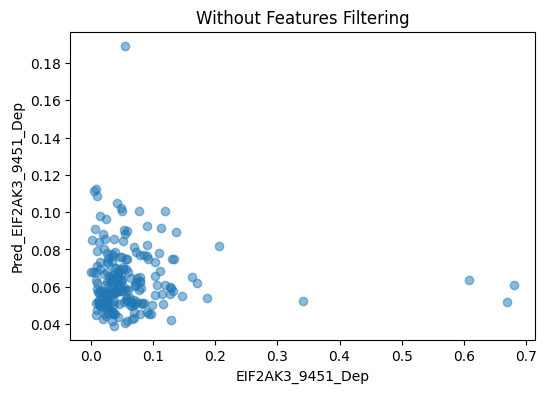

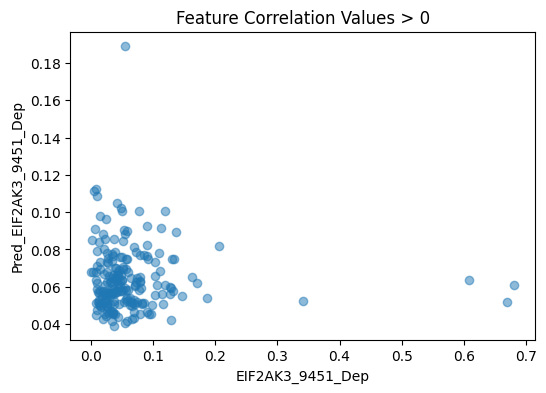

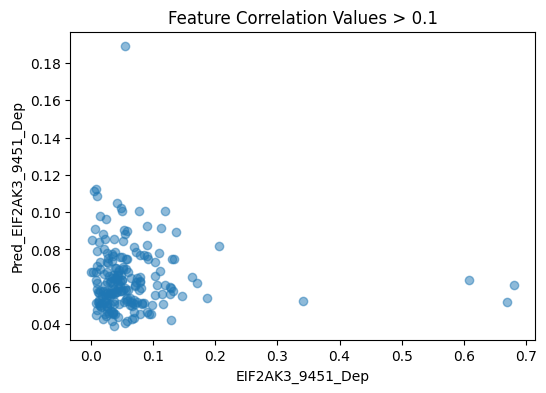

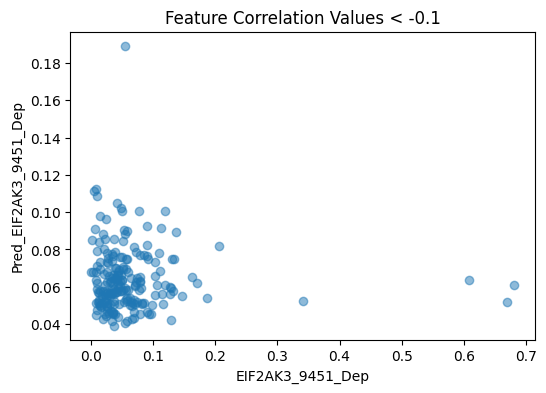

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_filtered_arranged_table.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_gt_00.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_gt_01.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_ng_01.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Extract the required columns
x = dfs[0]['EIF2AK3_9451_Dep']
y = dfs[0]['Pred_EIF2AK3_9451_Dep']

# Create scatter plots
titles = ['Without Features Filtering', 'Feature Correlation Values > 0', 'Feature Correlation Values > 0.1',
          'Feature Correlation Values < -0.1']

for i, df in enumerate(dfs):
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel('EIF2AK3_9451_Dep')
    plt.ylabel('Pred_EIF2AK3_9451_Dep')
    plt.title(titles[i])
    plt.show()


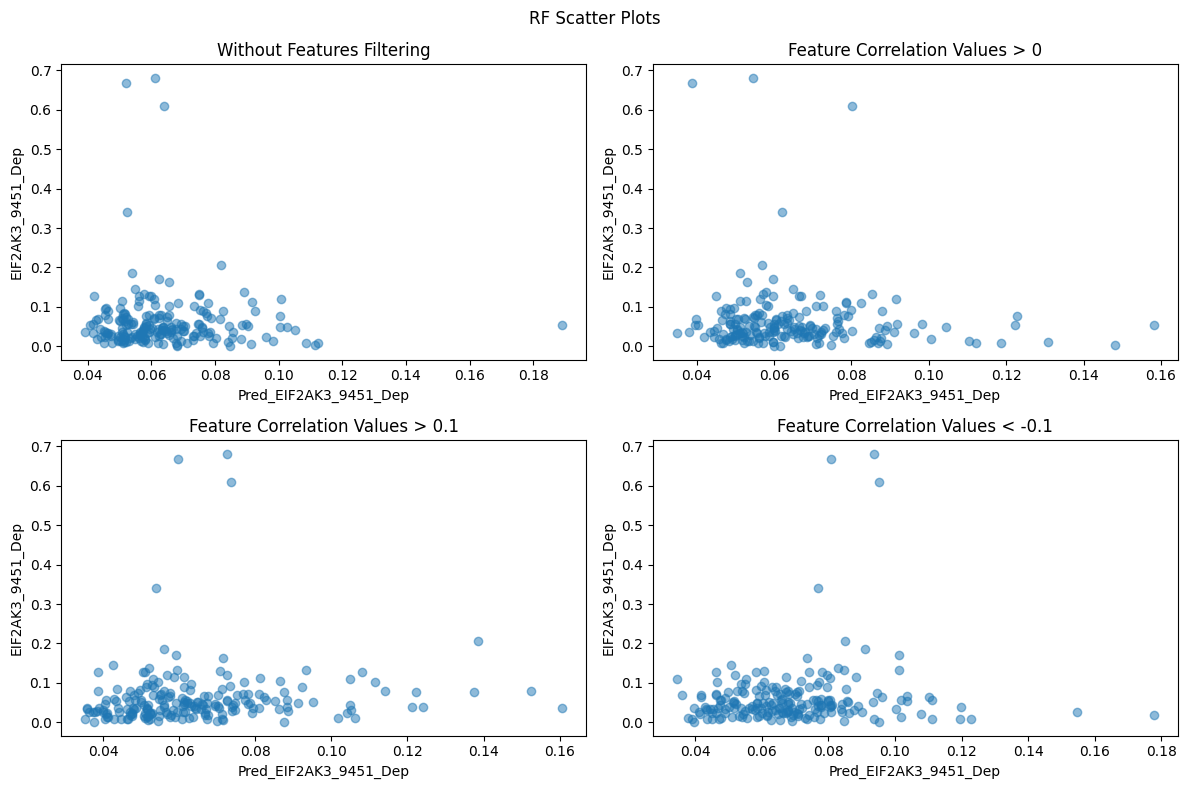

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_filtered_arranged_table.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_gt_00.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_gt_01.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_ng_01.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Extract the required columns
x = dfs[0]['Pred_EIF2AK3_9451_Dep']
y = dfs[0]['EIF2AK3_9451_Dep']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('RF Scatter Plots')

# Create scatter plots
titles = ['Without Features Filtering', 'Feature Correlation Values > 0', 'Feature Correlation Values > 0.1',
          'Feature Correlation Values < -0.1']

for i, df in enumerate(dfs):
    ax = axs[i // 2][i % 2]  # Select the subplot
    ax.scatter(df['Pred_EIF2AK3_9451_Dep'], df['EIF2AK3_9451_Dep'], alpha=0.5)
    ax.set_xlabel('Pred_EIF2AK3_9451_Dep')
    ax.set_ylabel('EIF2AK3_9451_Dep')
    ax.set_title(titles[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()


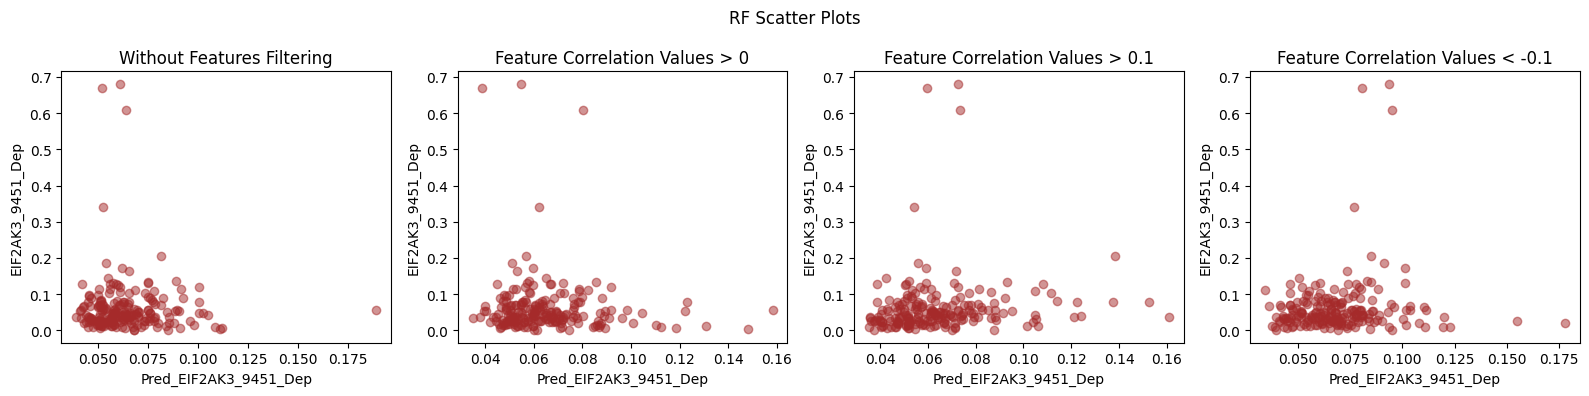

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_filtered_arranged_table.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_gt_00.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_gt_01.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/RF_EIF2AK3_ng_01.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('RF Scatter Plots')

# Create scatter plots
titles = ['Without Features Filtering', 'Feature Correlation Values > 0', 'Feature Correlation Values > 0.1',
          'Feature Correlation Values < -0.1']

for i, df in enumerate(dfs):
    ax = axs[i]  # Select the subplot
    ax.scatter(df['Pred_EIF2AK3_9451_Dep'], df['EIF2AK3_9451_Dep'], c='BROWN',alpha=0.5)
    ax.set_xlabel('Pred_EIF2AK3_9451_Dep')
    ax.set_ylabel('EIF2AK3_9451_Dep')
    ax.set_title(titles[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()
